# Mikhail Gulyi

# Peer-graded Assignment: Course Final Project

**Main objective of the analysis that also specifies whether your model will be focused on a specific type of Deep Learning or Reinforcement Learning algorithm and the benefits that your analysis brings to the business or stakeholders of this data.**  
The main objective of this analysis is to create a model which is able to predict breast canser diagnosis. The analysis will be dealing with sequential deep learning models. I'll also compare the models with more simple algorithms from sklearn. The benefit that this analysis brings is a model that can be used in medical facilities in order to diagnose breast canser.

In [50]:
# test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
outputfile = 'data/Breast Cancer Wisconsin (Diagnostic) Data Set.csv'
df = pd.read_csv(outputfile)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.**  
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant  

As has already been mentioned I want to create a decent model that is able to predict breast canser diagnosis

In [52]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)


The last feature is meaningless and the id feature is useless for us. I decided to drop them. 

In [53]:
df.shape

(569, 31)

In [54]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [55]:
df.isnull().sum().sum()

0

As you can see there's no null values in our dataset

In [56]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [57]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']


In [58]:
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
y = le.fit_transform(y)


Here I encoded the target feature using LabelEncoder. The initial values can be obtained using inverse_transform method.

In [59]:
le.inverse_transform(y)

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [60]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

I scaled all the float features using StandardScaler so that they are between -1 and 1. This step is necessary for the most of the following models.

In [61]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


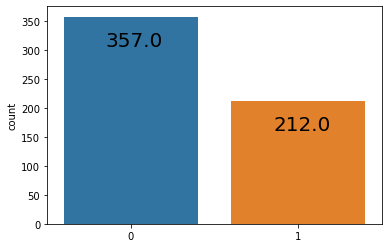

In [62]:
ax = sns.countplot(x=y)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()-50), size=20)

We can see that there are more benign ones than malignant in the dataset.

In [65]:
df = pd.concat([X, pd.DataFrame(y, columns=['diagnosis'])], axis=1)

This is a new preprocessed dataset.

In [66]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


<AxesSubplot:>

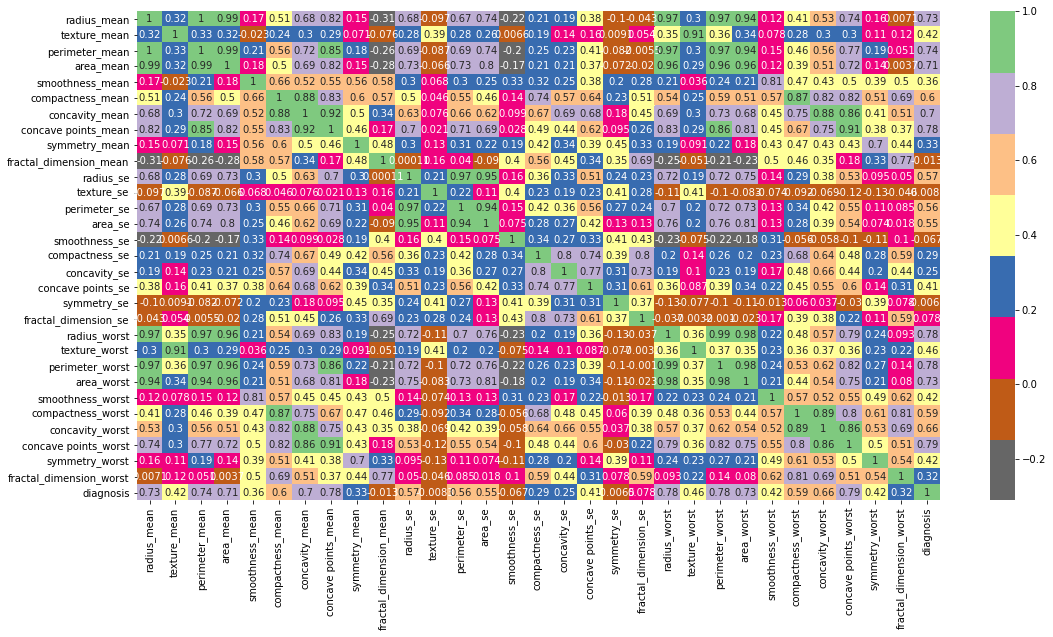

In [67]:
fig, ax = plt.subplots(figsize=(18,9))
sns.heatmap(df.corr(),ax=ax,annot = True, cmap ="Accent_r")

Here you can see the correlation between different features.

In [68]:
mean_columns = [col for col in df.columns if 'mean' in col]
mean_columns

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

Because a pairplot for all the 30 features would be clunky and cumbersome I'll only use features that have 'mean' in their names

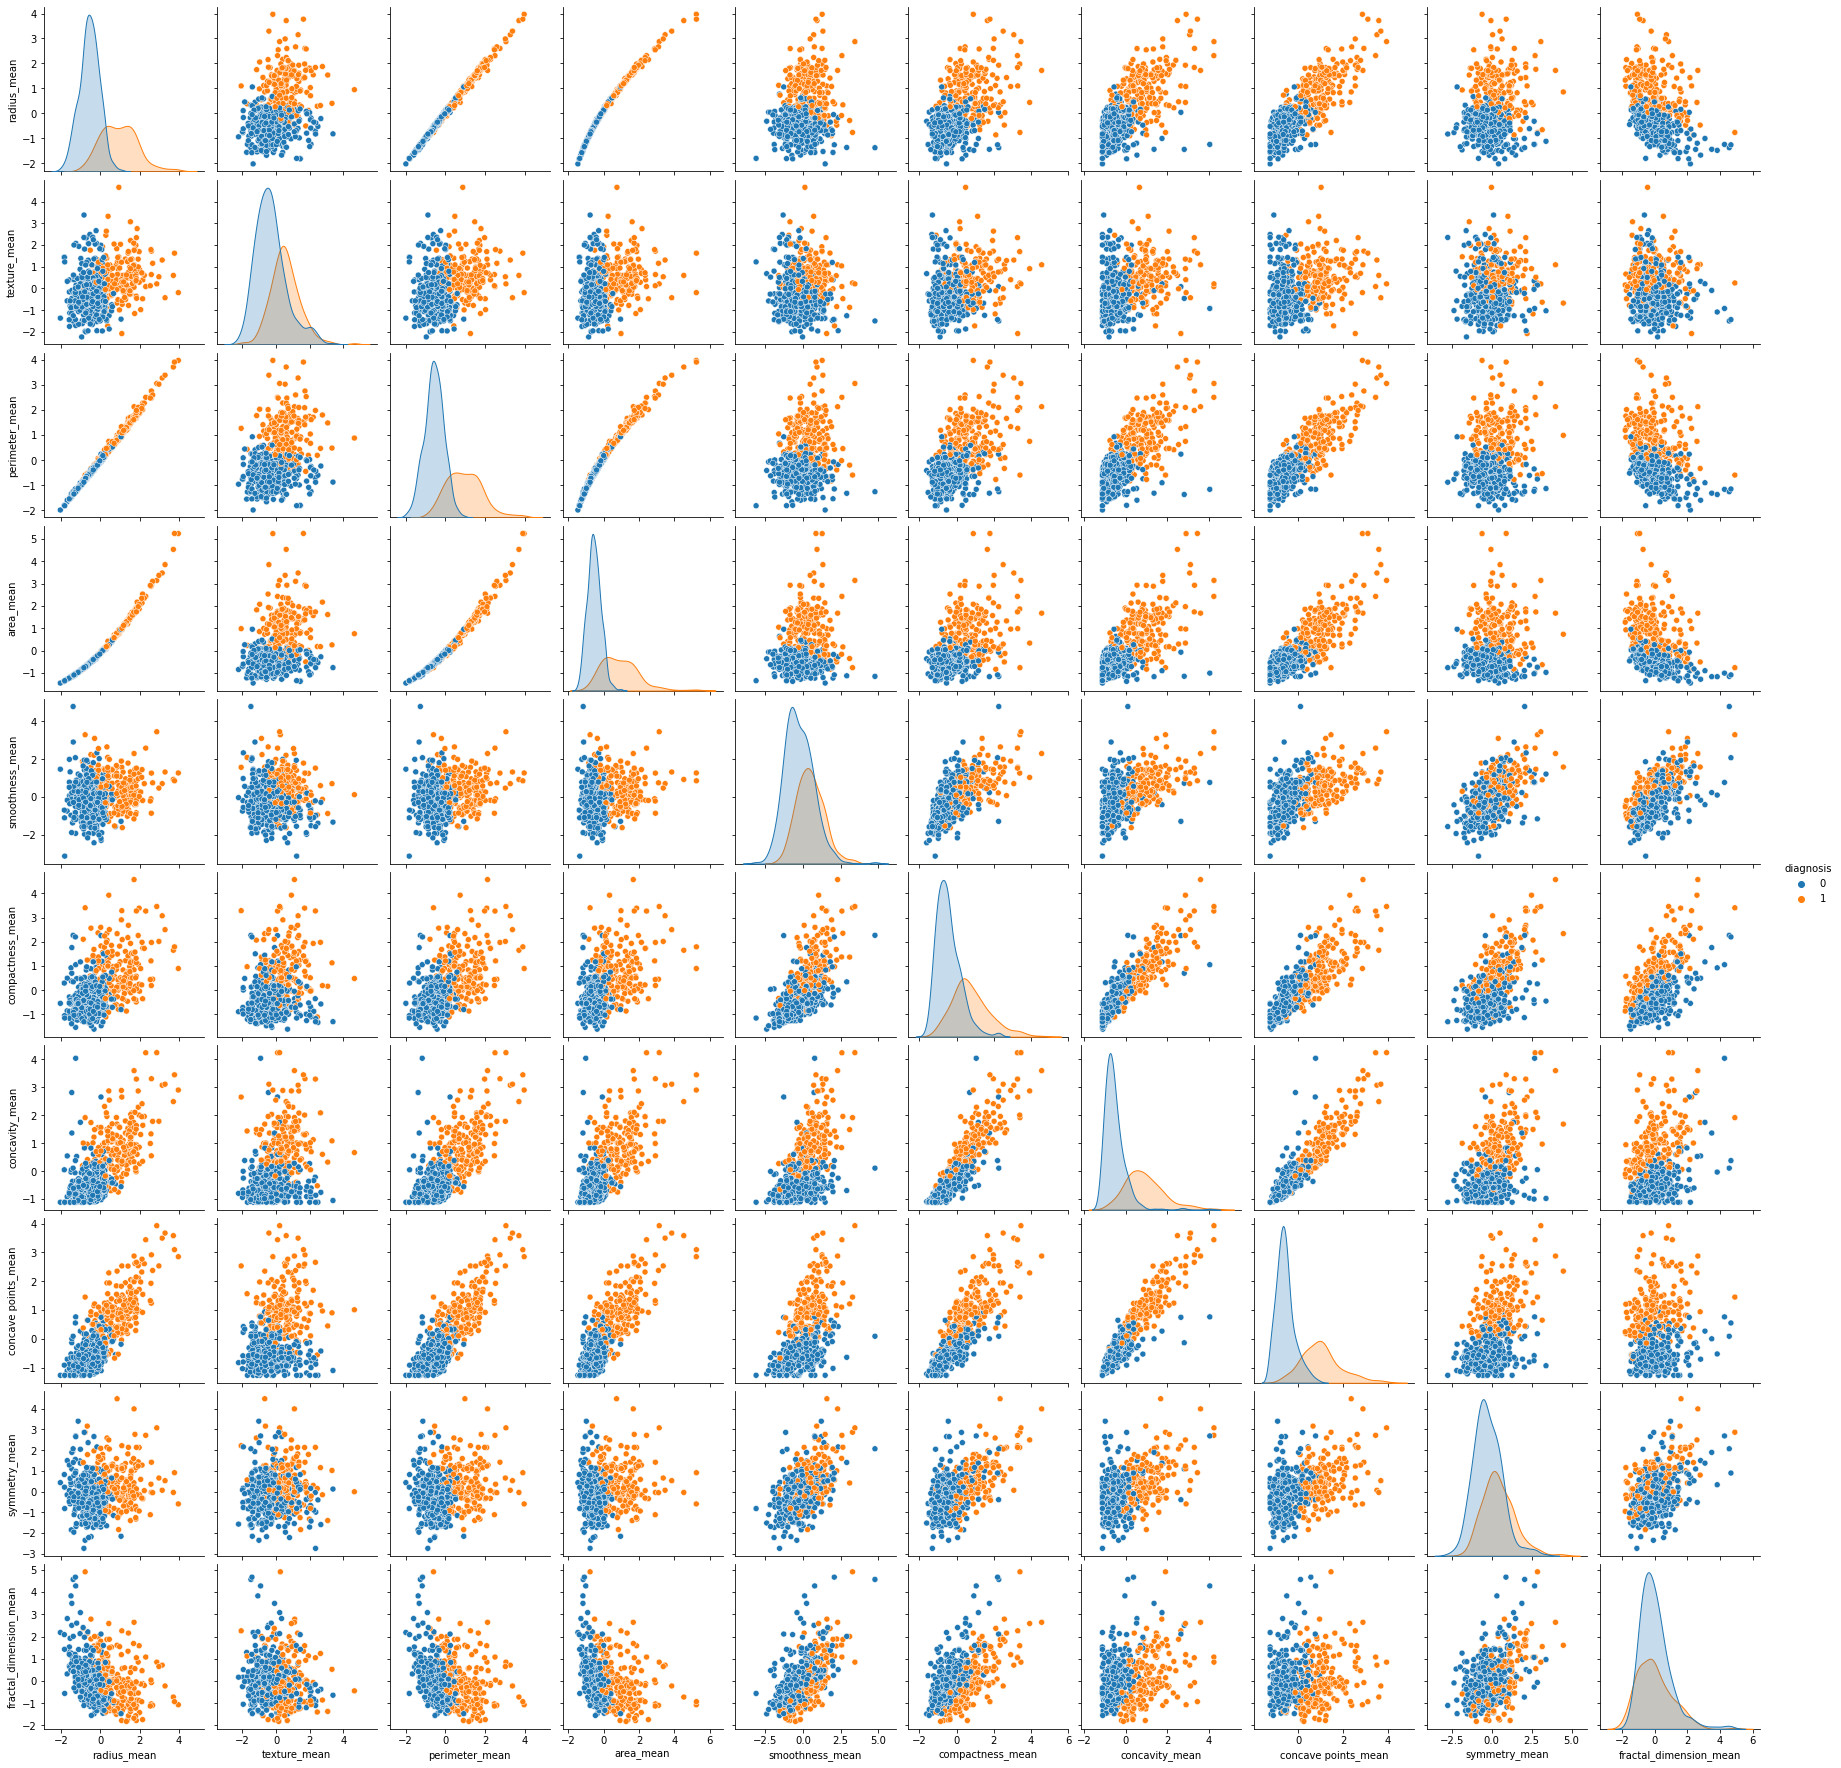

In [69]:
sns.pairplot(df[mean_columns+['diagnosis']], hue='diagnosis')

**Brief summary of data exploration and actions taken for data cleaning or feature engineering**  
So, I preprocessed the data and encoded the target. I also removed unneeded features.
Then I created a heatmap and a pairplot. You can see the distributions of some of the functions by looking at the pairplot, as well as the correlations of the features in the heatmap.

In [70]:
X.shape

(569, 30)

In [71]:
y.shape

(569,)

In [72]:
names_list, acc_list = [], []

I'll be saving the results of the models in these lists.

Now I evaluate the accuracy with some well-known machine learning algorithms and then I'll get down to deep learning models

## KNeighborsClassifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
kfold = StratifiedKFold(n_splits=4, shuffle=True)
knn = KNeighborsClassifier()
grid = [{'n_neighbors': range(1, 40), 'weights': ['uniform', 'distance']}]
gridsearch = GridSearchCV(estimator=knn, param_grid=grid, cv=kfold)
gridsearch.fit(X, y)
print("Best parameters from gridsearch: {}".format(gridsearch.best_params_))
print("Accuracy: %0.3f" % gridsearch.best_score_)

Best parameters from gridsearch: {'n_neighbors': 8, 'weights': 'distance'}
Accuracy: 0.972


In [74]:
names_list.append('knn 9 uniform')
acc_list.append(gridsearch.best_score_)

## LogisticRegression

In [75]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=10000)
grid = [{'C': np.logspace(-1, 10, 10)}]
gridsearch = GridSearchCV(
    estimator=log_reg, param_grid=grid,  cv=kfold)
gridsearch.fit(X, y)
print("Best parameters from gridsearch: {}".format(gridsearch.best_params_))
print("Accuracy: %0.3f" % gridsearch.best_score_)


Best parameters from gridsearch: {'C': 1.6681005372000592}
Accuracy: 0.979


In [76]:
names_list.append('log reg C=1.6681005372000592')
acc_list.append(gridsearch.best_score_)

## LinearSVC

In [77]:
from sklearn.svm import LinearSVC
LSVC = LinearSVC(max_iter=100000)
grid = [{'C': np.linspace(0.1, 20)}]
gridsearch = GridSearchCV(estimator=LSVC, param_grid=grid,  cv=kfold)
gridsearch.fit(X, y)
print("Best parameters from gridsearch: {}".format(gridsearch.best_params_))
print("Accuracy: %0.3f" % gridsearch.best_score_)


Best parameters from gridsearch: {'C': 0.1}
Accuracy: 0.975


In [78]:
names_list.append('LinearSVC C=0.5061224489795918')
acc_list.append(gridsearch.best_score_)

## RandomForestClassifier

In [79]:
from sklearn.ensemble import RandomForestClassifier
grid = {'n_estimators': np.arange(150, 251, 10)}
rfc = RandomForestClassifier(n_jobs=-1)
gridsearch = GridSearchCV(estimator=rfc, param_grid=grid, cv=kfold)
gridsearch.fit(X, y)
print("Best parameters from gridsearch: {}".format(gridsearch.best_params_))
print("Accuracy: %0.3f" % gridsearch.best_score_)


Best parameters from gridsearch: {'n_estimators': 210}
Accuracy: 0.967


In [80]:
names_list.append('RandomForestClassifier 220')
acc_list.append(gridsearch.best_score_)

## ExtraTreesClassifier

In [81]:
from sklearn.ensemble import ExtraTreesClassifier
grid = {'n_estimators': np.arange(150, 251, 10), 'bootstrap': [True, False]}
etc = ExtraTreesClassifier(n_jobs=-1)
gridsearch = GridSearchCV(estimator=etc, param_grid=grid, cv=kfold)
gridsearch.fit(X, y)
print("Best parameters from gridsearch: {}".format(gridsearch.best_params_))
print("Accuracy: %0.3f" % gridsearch.best_score_)

Best parameters from gridsearch: {'bootstrap': False, 'n_estimators': 190}
Accuracy: 0.970


In [82]:
names_list.append('ExtraTreesClassifier 220 bootstrap=False 180')
acc_list.append(gridsearch.best_score_)

## GradientBoostingClassifier

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
grid = {'n_estimators': np.arange(150, 250, 10), 'learning_rate': [1, 0.1, 0.01],
        'subsample': [1.0, 0.5], 'max_features': np.arange(1, len(df.columns), 5)}
gridsearch = GridSearchCV(estimator=gbc, param_grid=grid, cv=kfold, n_jobs=-1)
gridsearch.fit(X, y)
print("Best parameters from gridsearch: {}".format(gridsearch.best_params_))
print("Accuracy: %0.3f" % gridsearch.best_score_)


Best parameters from gridsearch: {'learning_rate': 0.1, 'max_features': 6, 'n_estimators': 210, 'subsample': 0.5}
Accuracy: 0.974


In [84]:
names_list.append('GBC lr=0.1 mf=11 n_est=180 subsample=0.5')
acc_list.append(gridsearch.best_score_)

In [86]:
(X.shape[1],)

(30,)

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Deep learning models

Here I'll compare 3 sequential models with different hyper parameters

In [88]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score


def create_model():
    model_1 = Sequential()
    model_1.add(Dense(12, input_shape=(X.shape[1],), activation='sigmoid'))
    model_1.add(Dense(1, activation='sigmoid'))
    model_1.compile(optimizer='sgd', loss="binary_crossentropy",
                    metrics=["accuracy"])
    return model_1


classifier = KerasClassifier(build_fn=create_model, epochs=200, verbose=False)
kfold = StratifiedKFold(n_splits=4, shuffle=True)
result_acc = cross_val_score(estimator=classifier, X=X, y=y, cv=kfold)

print('accuracy is {:.3f}'.format(result_acc.mean()))


accuracy is 0.967


In [89]:
names_list.append('model_1')
acc_list.append(result_acc.mean())

In [90]:
def create_model():
    model_2 = Sequential()
    model_2.add(Dense(6, input_shape=(X.shape[1],), activation="relu"))
    model_2.add(Dense(6,  activation="relu"))
    model_2.add(Dense(1, activation="sigmoid"))
    model_2.compile(optimizer='rmsprop', loss="binary_crossentropy",
                    metrics=["accuracy"])
    return model_2


classifier = KerasClassifier(build_fn=create_model, epochs=200, verbose=False)
kfold = StratifiedKFold(n_splits=4, shuffle=True)
result_acc = cross_val_score(estimator=classifier, X=X, y=y, cv=kfold)

print('accuracy is {:.3f}'.format(result_acc.mean()))


accuracy is 0.977


In [91]:
names_list.append('model_2')
acc_list.append(result_acc.mean())

In [92]:
def create_model():
    model_3 = Sequential()
    model_3.add(Dense(10, input_shape=(X.shape[1],), activation="relu"))
    model_3.add(Dense(10,  activation="relu"))
    model_3.add(Dropout(0.25))
    model_3.add(Dense(10,  activation="relu"))
    model_3.add(Dropout(0.25))
    model_3.add(Dense(1, activation="sigmoid"))
    model_3.compile(optimizer='adam', loss="binary_crossentropy",
                    metrics=["accuracy"])
    return model_3


classifier = KerasClassifier(build_fn=create_model, epochs=200, verbose=False)
kfold = StratifiedKFold(n_splits=4, shuffle=True)
result_acc = cross_val_score(estimator=classifier, X=X, y=y, cv=kfold)

print('accuracy is {:.3f}'.format(result_acc.mean()))


accuracy is 0.981


In [93]:
names_list.append('model_3')
acc_list.append(result_acc.mean())

In [94]:
pd.DataFrame(list(zip(names_list, acc_list)), columns=['name', 'accuracy'])

,name,accuracy
0,knn 9 uniform,0.971880
1,log reg C=1.6681005372000592,0.978935
2,LinearSVC C=0.5061224489795918,0.975414
3,RandomForestClassifier 220,0.966611
4,ExtraTreesClassifier 220 bootstrap=False 180,0.970095
5,GBC lr=0.1 mf=11 n_est=180 subsample=0.5,0.973653
6,model_1,0.966611
7,model_2,0.977187
8,model_3,0.980683


**Summary of training at least three variations of the Deep Learning model you selected. For example, you can use different clustering techniques or different hyperparameters.**  
You can see the results in the table above. I compared the deep learning models with sklearn classifiers.

**A paragraph explaining which of your classifier models you recommend as a final model that best fits your needs in terms of accuracy and explainability.**  
All the models above showed quite good results. Of course I would recommed the model_3 since it has showed the best results. Unfortunately, it's difficult to achive explainability with with model as it's a deep leaning model

**Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your classifier model.**  
You've seen everything in the report. To sum up, all the models showed good results and can be usable.

**Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model after adding specific data features that may help you achieve a better explanation or a better prediction.**  
It would be nice to conduct a similar analysis with other models and other hyperparameters.